# ASTR302 Lab 2: Statistical Distributions and Uncertainties

In this Lab you will continue to explore statistical distributions and develop an understanding of how they are used to estimate measurement uncertainties.

## Statistical Distribution Review

Previously, we explored the uniform, Gaussian (or Normal), Binomial, and Poisson distributions. The latter three all have wide use in determining measurement uncertianties or outcomes.

You should have a good understanding of which situations are related to the use of the Binomial and Poisson distributions from Lab 1. 

The Gaussian distribution is most closely related to the distribution of expected measurement deviations. This makes intuitive sense in that we expect our measurements to be unbiased with respect to the underlying correct value (so the deviations are symetrically centered on zero deviation) and that large deviations are rarer than small ones. Exactly how rare or not we will calculate next.

## Gaussians and the Interpretaton of $\sigma$

Before we start, lets import the packages you will be needing for this Lab.


In [1]:
import numpy as np
import scipy.integrate as integrate   # to help us do integrals

Recall that the Gaussian distribution is
$$P(x) = \frac{1}{\sigma\sqrt{2\pi}} e^{-(x-\mu)^2/2\sigma^2}$$
where $\mu$ is the mean value (the true value if **there are no systematic errors** and $\sigma$ is the **standard deviation** or dispersion. The coefficient is there to ensure that the integral from $-\infty$ to $\infty$ is 1 (as it should be because there is a 100% chance of the measurement being between $-\infty$ to $\infty$). Therefore, $\sigma$ is clearly the parameter of interest that describes how far 'off' our measurements can be.

Let's find out what fraction of the time we can expect our measurement to be 1$\sigma$ or less from the true value. To do this we can just integrate $P(x)$ between $\pm 1 \sigma$. 

In [3]:
sigma = 1.37  # I just chose a random number for sigma
integral = integrate.quad(lambda x: 1/(np.sqrt(2*np.pi)*sigma)*np.exp(-x**2/(2*sigma**2)), -1*sigma, 1*sigma)  #integrating from -1sigma to +1sigma
print(f'Fraction of area under Gaussian between +- 1 sigma = {integral[0]:.3f}')
print(f'Likelihood of having a chance measurement beyond +- 1 sigma = {1-integral[0]:.3f}')

Fraction of area under Gaussian between +- 1 sigma = 0.683
Likelihood of having a chance measurement beyond +- 1 sigma = 0.317


A measurement that has a low likelihood of agreeing with the expectation is taken as evidence of a problem with the expectation. For example, it can be used out to rule out the specific model on which that expectation was based. A 32% chance, however, is not particularly compelling - it isn't so unlikely that the disagreement is just due to random chance. By convention in astronomy we often take a 3$\sigma$ deviation as being compelling.

In [4]:
sigma = 1.37  # I just chose a random number for sigma
integral = integrate.quad(lambda x: 1/(np.sqrt(2*np.pi)*sigma)*np.exp(-x**2/(2*sigma**2)), -3*sigma, 3*sigma)  #integrating from -1sigma to +1sigma
print(f'Fraction of area under Gaussian between +- 3 sigma = {integral[0]:.3f}')
print(f'Likelihood of having a chance measurement beyond +- 3 sigma = {1-integral[0]:.3f}')

Fraction of area under Gaussian between +- 3 sigma = 0.997
Likelihood of having a chance measurement beyond +- 3 sigma = 0.003


<div class="alert alert-info">What is the likelihood of such a 3$\sigma$ deviation being due to random chance? </div> 

<div class="alert alert-block alert-success">
Answer: As you can see above, the code was edited to have a 3$\sigma$ deviation where you can see the fraction of area under Gaussian between +- 3$\sigma$ = 0.997 which is 99.7%. You can also see the likelihood of having a chance of measurement beyond +- 3$\sigma$ - 0.003 or 0.3%. The likelihood of having a chance measurement beyond +- 3$\sigma$ is the likelihood of such a 3$\sigma$ deviation being due to random change is 0.003 or 0.3%.
</div>

For particularly important results, the threshold may be set even higher.

An important property of this line of thinking is that the likelihood is not dependent on the specific value of $\sigma$ as long as you quote the deviation in terms of $\sigma$ (i.e. a '3$\sigma$ deviation'). 

In [4]:
sigma = 2.973  # I just chose a random number for sigma
integral = integrate.quad(lambda x: 1/(np.sqrt(2*np.pi)*sigma)*np.exp(-x**2/(2*sigma**2)), -3*sigma, 3*sigma)  #integrating from -1sigma to +1sigma
print(f'Fraction of area under Gaussian between +- 3 sigma = {integral[0]:.3f}')
print(f'Likelihood of having a chance measurement beyond +- 3 sigma = {1-integral[0]:.3f}')

Fraction of area under Gaussian between +- 3 sigma = 0.997
Likelihood of having a chance measurement beyond +- 3 sigma = 0.003


In [5]:
sigma = 5  # I just chose a random number for sigma
integral = integrate.quad(lambda x: 1/(np.sqrt(2*np.pi)*sigma)*np.exp(-x**2/(2*sigma**2)), -3*sigma, 3*sigma)  #integrating from -1sigma to +1sigma
print(f'Fraction of area under Gaussian between +- 3 sigma = {integral[0]:.3f}')
print(f'Likelihood of having a chance measurement beyond +- 3 sigma = {1-integral[0]:.3f}')

Fraction of area under Gaussian between +- 3 sigma = 0.997
Likelihood of having a chance measurement beyond +- 3 sigma = 0.003


<div class="alert alert-info"> Confirm that is the case by changing the value of $\sigma$ to 2.973 (another, different, random number).

 - Confirmed with both 2.973 and a random number above</div>

It is always a good thing when there are multiple ways to calculate an answer to a question. 

Integrals can in general also be evaluated using random numbers. Such technniques are generally dubbed 'Monte Carlo' in reference to the element of chance (and the famous casino of Monte Carlo - see https://www.montecarlosbm.com/en/casino-monaco/casino-monte-carlo). 

In this case we can just draw from a Gaussian distribution (which you have already done in Lab 1) and evaluate what fraction of the time is the draw within 1$\sigma$. 

<div class="alert alert-info">Confirm your previous results for 1 and 3 $\sigma$. If they are not quite the same as before, why and what might you change? Answer below. </div>

In [6]:
sigma = 1.37
sample = np.random.normal(0,sigma,1000)


sample_within_1_sigma = [x for x in sample if -sigma <= x <= sigma]

fraction_within_1_sigma = len(sample_within_1_sigma) / len(sample)

likelihood_beyond_1_sigma = 1 - fraction_within_1_sigma


print(f'Fraction of area under Gaussian between +- 1 sigma = {len(sample_within_1_sigma)/len(sample):.3f}')
print(f'Likelihood of having a measurement beyond +- 1 sigma = {1-len(sample_within_1_sigma)/len(sample):.3f}')

Fraction of area under Gaussian between +- 1 sigma = 0.688
Likelihood of having a measurement beyond +- 1 sigma = 0.312


In [7]:
sigma = 1.37
sample = np.random.normal(0,sigma,1000)


sample_within_3_sigma = [x for x in sample if -3*sigma <= x <= 3*sigma]

fraction_within_3_sigma = len(sample_within_3_sigma) / len(sample)

likelihood_beyond_3_sigma = 3 - fraction_within_3_sigma


print(f'Fraction of area under Gaussian between +- 3 sigma = {len(sample_within_3_sigma)/len(sample):.3f}')
print(f'Likelihood of having a measurement beyond +- 3 sigma = {1-len(sample_within_3_sigma)/len(sample):.3f}')

Fraction of area under Gaussian between +- 3 sigma = 0.998
Likelihood of having a measurement beyond +- 3 sigma = 0.002


<div class="alert alert-block alert-success">
Answer: As you can se, the values have a very slight deviation due to the calculated values of 0.683 and 0.317 for 1$\sigma$ and 0.997 and 0.003 for 3$\sigma$. This is partially due to the fact we are getting data from a random sample function. It is also due to the fact that I am only using a sample size of 1000 meaning that there is still room for being some randomness in the data. However, if we used a larger sample size of something like 10,000 or more, than we would start to get closer to the original values from before. I ran it again below with a sample size of 100,000 and this time I got the exact values i was looking for, for a 1$\sigma and a 3$\sigma$
</div>

In [21]:
sigma = 1.37
sample = np.random.normal(0,sigma,100000)

sample_within_1_sigma = [x for x in sample if -sigma <= x <= sigma]
fraction_within_1_sigma = len(sample_within_1_sigma) / len(sample)
likelihood_beyond_1_sigma = 1 - fraction_within_1_sigma

sample_within_3_sigma = [x for x in sample if -3*sigma <= x <= 3*sigma]
fraction_within_3_sigma = len(sample_within_3_sigma) / len(sample)
likelihood_beyond_3_sigma = 3 - fraction_within_3_sigma

print(f'Fraction of area under Gaussian between +- 1 sigma = {len(sample_within_1_sigma)/len(sample):.3f}')
print(f'Likelihood of having a measurement beyond +- 1 sigma = {1-len(sample_within_1_sigma)/len(sample):.3f}')
print(f'Fraction of area under Gaussian between +- 3 sigma = {len(sample_within_3_sigma)/len(sample):.3f}')
print(f'Likelihood of having a measurement beyond +- 3 sigma = {1-len(sample_within_3_sigma)/len(sample):.3f}')

Fraction of area under Gaussian between +- 1 sigma = 0.683
Likelihood of having a measurement beyond +- 1 sigma = 0.317
Fraction of area under Gaussian between +- 3 sigma = 0.997
Likelihood of having a measurement beyond +- 3 sigma = 0.003


## Determining $\sigma$

If we know the value of $\sigma$, then we can calculate the likelihood of a particular measurement - **however we rarely know $\sigma$ in advance.** To estimate $\sigma$ we turn to the standard deviation of our measurements. If we have enough meaurements and if the measurement excursions are drawn from a Gaussian distribution, then the standard deviation will be a fair approximation of $\sigma$. 

Recall that the standard deviation is calcluated using
$$S^2 = \frac{1}{N}\sum_{i=1}^{N} (x_i-\mu)^2,$$
but fortuntely numpy has a built-in function to do this.

In [22]:
standard_dev = np.std(sample)
print(f'The standard deviation of the set of Gaussian draws = {standard_dev:.3f}')

The standard deviation of the set of Gaussian draws = 1.367


Did you get the result you expected?
- While it is not the exact number for the standard deviation tht I was expecting, it is very close and when rounded it is the number I had expected.

<div class="alert alert-info"> Now, lets assume you have a set of measurements (included in the cell below as the array measurements). 
What you would quote as your result? 
The convention is to quote the mean value $\pm 1\sigma$. So remember that most uncertainty ranges that you see only include about 2/3rds of the expected measurements. Fill in the cell below. </div>

In [24]:
# calculate mean value and standard deviation
# np.mean is the numpy function for mean

measurements = np.array([5.99792596,11.06015541,11.65410636,19.80187928,6.759849,13.71022563,
16.6081179,13.88738697,13.98100988,12.44655947])

mean = np.mean(measurements)
standard_dev = np.std(measurements)

print(f'The standard deviation of the set of Gaussian draws = {standard_dev:.3f}')
print(f'Mean = {mean:3f}')

The standard deviation of the set of Gaussian draws = 3.921
Mean = 12.590722


- my result for the array of measurements above would be 12.59 $\pm$ 3.92 which is the mean $\pm$ 1$\sigma$

The Gaussian distribution is appropriate when the distribution is not limited by other factors. An example where the distribution is limited is a counting experiment because the counts cannot be $<$ 0. This situation can become particular extreme if the expected counts are quite small, i.e. near 0. For this we use the Poisson distribution and the uncertainties can be calculated in a similar manner (using either the integral or sampling approaches) but there is also a simple prescritpion that works roughly, which is that $\sigma = \sqrt{N}$, where $N$ is the number of events. For example, if the mean is 10 events, then you can quote 10$\pm \sqrt{10}$. Because photon flux rates tend to be small, Poissonian error estimates are often used in this context - but be careful, because they are not quite mathematically correct.

## Propagating Uncertainties

You now know how to take your measurements and quote a value, its uncertainty, and therefore the likelihood of getting such a value in comparison either to another measurement or a theoretical model. But what happens if what you are really after is a mathematical combination of two measurements. In others words, $(A \pm \sigma_A) + (B \pm \sigma_B) = (A+B) \pm ??$. 

**It is not $(A+B) \pm (\sigma_A + \sigma_B)$.** Can you explain why it isn't?

The standard way to propagate uncertainties in mathematical combinations of indepenent measurements (the value of $A$ in no way depends on the value of $B$), is as follows for the situation where $C = f(A,B)$ (and is generalizable to a larger number of variables):
$$\sigma_C^2 = \big(\frac{\partial f}{\partial A}\big)^2\sigma_A^2 + \big(\frac{\partial f}{\partial B}\big)^2\sigma_B^2$$

<div class="alert alert-info">Consider A $(12.5 \pm 3.5)$ and B $(13.1 \pm 2.9)$ and evaluate the sum and the difference of these, and given the propagated uncertainties using the above formula. Then, calculate the same using a numerical approach. Create two Gaussian samples of values representing A and B, sum (and difference) them and calculate the standard deviations of the resulting sets. Compare and discuss in the cell below.</div>

In [29]:
# code to Monte Carlo the propagated uncertainties 
import numpy as np 

A_mean = 12.5
A_std = 3.5
B_mean= 13.1
B_std = 2.9

num_samples = 10000 

def monte_carlo_simulation(A_mean, A_std, B_mean, B_std, num_samples):
    A_samples = np.random.normal(A_mean, A_std, num_samples)
    B_samples = np.random.normal(B_mean, B_std, num_samples)
    
    sum_samples = A_samples + B_samples
    diff_samples = A_samples - B_samples
    
    sum_mean = np.mean(sum_samples)
    sum_std = np.std(sum_samples)
    diff_mean = np.mean(diff_samples)
    diff_std = np.std(diff_samples)
    
    return sum_mean, sum_std, diff_mean, diff_std 

print("\nMonte Carlo Simulation:")
sum_mean_mc, sum_std_mc, diff_mean_mc, diff_std_mc = monte_carlo_simulation(A_mean, A_std, B_mean, B_std, num_samples)
print(f"Sum Mean: {sum_mean_mc:3f}, Sum Std: {sum_std_mc:3f}")
print(f"Diff Mean: {diff_mean_mc:3f}, Diff Std: {diff_std_mc:3f}")
print(f'Sum_C = {sum_mean_mc:3f} +- {sum_std_mc:3f}')
print(sum_mean_mc + sum_std_mc)
print(sum_mean_mc - sum_std_mc)
print(f'Difference_C = {diff_mean_mc:3f} +- {diff_std_mc:3f}')
print(diff_mean_mc + diff_std_mc)
print(diff_mean_mc - diff_std_mc)


Monte Carlo Simulation:
Sum Mean: 25.624047, Sum Std: 4.564693
Diff Mean: -0.569645, Diff Std: 4.558573
Sum_C = 25.624047 +- 4.564693
30.18874006922364
21.059354642730106
Difference_C = -0.569645 +- 4.558573
3.9889285840295696
-5.12821806734874


In [27]:
# Created version to calculate
import math

A = 12.5
sigma_A = 3.5
B = 13.1
sigma_B = 2.9
Sum_C = A + B
Diff_C = A - B
sum_sigma_C = math.sqrt(sigma_A**2 + sigma_B**2)
diff_sigma_C = math.sqrt((sigma_A**2 + sigma_B**2))

print(f'Sum_C = {Sum_C} +- {sum_sigma_C:3f}')
print(f'Difference_C = {Diff_C} +- {diff_sigma_C:3f}')

Sum_C = 25.6 +- 4.545327
Difference_C = -0.5999999999999996 +- 4.545327


- For this particular example, both the theoretical propagation of uncertainty and the Monte Carlo simulation provide identical results. This confirms that the code and the theoretical approach are correct. In more complicated scenarios, the Monte Carlo method can offer more flexibility and robustness, while for simple operations like addition and subtraction of independent measurements, the analytical formula is sufficient and computationally faster.

Depending on the context, sometimes we refer to the ratio between the measurement and the uncertainty as the **signal-to-noise ratio** (S/N). For example, if the measurement for A above ($12.5 \pm 3.4$) represented the measurement of the flux from a star, we would say that the star was detected with S/N = 3.7. 

<div class="alert alert-info">How does the S/N for an observed star vary with the time you observe the star? (assume constant flux with time) </div>

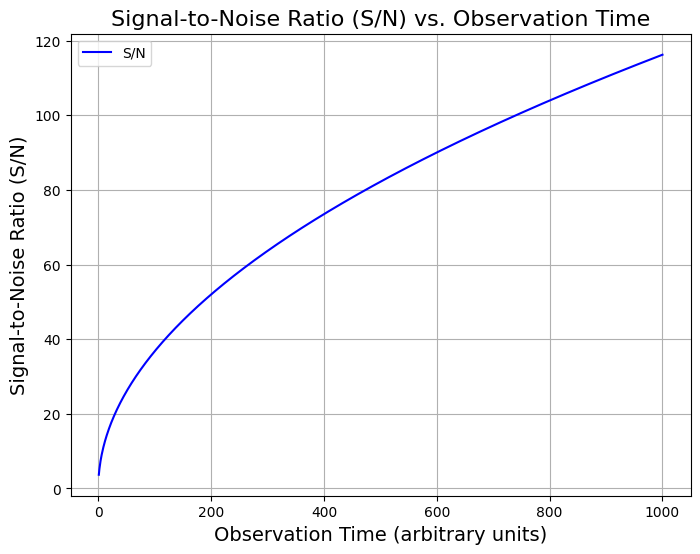

In [12]:
import numpy as np
import matplotlib.pyplot as plt

# Constants
flux_mean = 12.5  # Measured flux (signal)
flux_std = 3.4    # Uncertainty in the flux (noise)

# Number of simulation steps (time in arbitrary units)
time_steps = 1000
observation_times = np.linspace(1, 1000, time_steps)  # Time increases from 1 to 100
SNR_values = []

# Simulate the S/N for each observation time
for T in observation_times:
    # As the time increases, we get more measurements (N = T), so uncertainty decreases
    sigma_A = flux_std / np.sqrt(T)  # Uncertainty scales with sqrt(time)
    
    # Calculate the Signal-to-Noise ratio (S/N)
    SNR = flux_mean / sigma_A
    SNR_values.append(SNR)

# Plot the results
plt.figure(figsize=(8, 6))
plt.plot(observation_times, SNR_values, label="S/N", color="b")
plt.xlabel("Observation Time (arbitrary units)", fontsize=14)
plt.ylabel("Signal-to-Noise Ratio (S/N)", fontsize=14)
plt.title("Signal-to-Noise Ratio (S/N) vs. Observation Time", fontsize=16)
plt.grid(True)
plt.legend()
plt.show()

<div class="alert alert-block alert-success">
Answer: As you can see the longer you observe the star, the higher the S/N becomes, as the uncertainty in the measurement decreases with the square root of the time(square root relationship with S/N increasing with the square root of time).
</div>

Now lets consider why we do not do optical astronomy during the daytime - after all, the stars themselves have the same flux day or night. The flux we observe for a star is the combination of the flux of the star and the flux of the sky. The flux of the sky is about $10^7$ times brighter in the daytime than at night. Lets assume that we have a star with flux 1000 units and at night the sky contributes 100 units on top of the star (so you measure 1100 units, subtract 100 units, and are left with a measureent of 1000 units).

<div class="alert alert-info"> What is the S/N of that observation?
What is the S/N obtained if one observes the same star during the day? </div>

Nighttime S/N: 30.15
Daytime S/N: 0.03


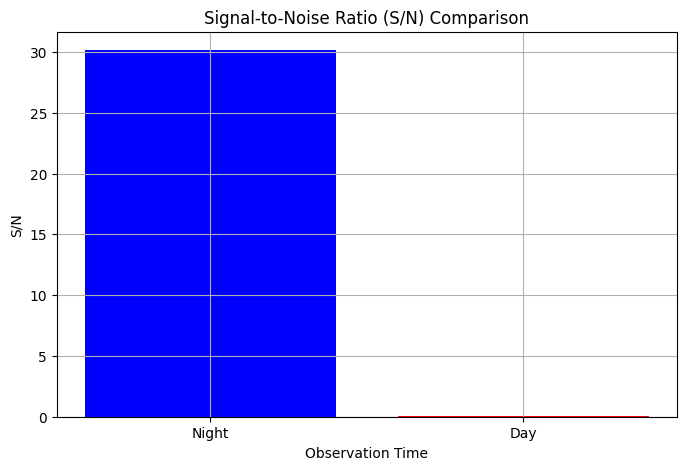

In [17]:
import numpy as np

# Given data
star_flux = 1000  # flux of the star (units)
sky_flux_night = 100  # sky flux at night (units)
sky_flux_day = 10**9  # sky flux during the day (10^7 times brighter than at night, so 10^9)

# Calculate S/N at night
# Noise at night is the sum of the variances from star and sky
sigma_star_night = np.sqrt(star_flux)  # noise from star flux
sigma_sky_night = np.sqrt(sky_flux_night)  # noise from sky flux
sigma_total_night = np.sqrt(sigma_star_night**2 + sigma_sky_night**2)  # total noise at night

# S/N at night
SNR_night = star_flux / sigma_total_night

# Calculate S/N during the day
# Noise during the day is the sum of variances from star and sky
sigma_star_day = np.sqrt(star_flux)  # noise from star flux
sigma_sky_day = np.sqrt(sky_flux_day)  # noise from sky flux
sigma_total_day = np.sqrt(sigma_star_day**2 + sigma_sky_day**2)  # total noise during the day

# S/N during the day
SNR_day = star_flux / sigma_total_day

# Print results
print(f"Nighttime S/N: {SNR_night:.2f}")
print(f"Daytime S/N: {SNR_day:.2f}")

# Optionally, if you'd like to visualize the S/N for both cases, here's a plot:
import matplotlib.pyplot as plt

# Data for plotting
times_of_day = ['Night', 'Day']
SNR_values = [SNR_night, SNR_day]

# Plot
plt.figure(figsize=(8, 5))
plt.bar(times_of_day, SNR_values, color=['blue', 'red'])
plt.title("Signal-to-Noise Ratio (S/N) Comparison")
plt.ylabel("S/N")
plt.xlabel("Observation Time")
plt.grid(True)
plt.show()

<div class="alert alert-block alert-success">
Answer: The signal-to-noise ratio is much higher at night because the sky flux is much lower, making it easier to detect the star against the background noise. During the day, the sky flux is so much brighter (by a factor of 10^7), that it dominates the signal, leading to a very low S/N, which makes it difficult to detect the star. This is why optical astronomy is not typically done during the day.
</div>

## Conclusion: 

 <div class="alert alert-info"> Save your notebook.  Append your LastNameFirstInitial to the filename and submit via D2L</div>

## Extra:

We have worked primarily with Gaussian distributions, which are standard for error estimation. However, there are other distributions of interest. One is the Lorentzian, which is given
by

$$L(x) = {1\over{1+\large({{x-\mu}\over{w/2}}\large)^2}},$$

where $\mu$ is the mean and $w$ is the full width at half maximium (FWHM). Make a plot to compare the Gaussian and Lorentzian function (normalize to have the same value at $\mu$). How do the wings compare? Calculate how many Gaussian $\sigma$ it would take to have the equivalent 90\% confidence inteval. FYI : the Lorentzian describes the intrinsic shape of spectral lines, while the convolution of a Lorentzian and a Gaussian describe the observed shape of spectral lines and is called a Voigt profile.

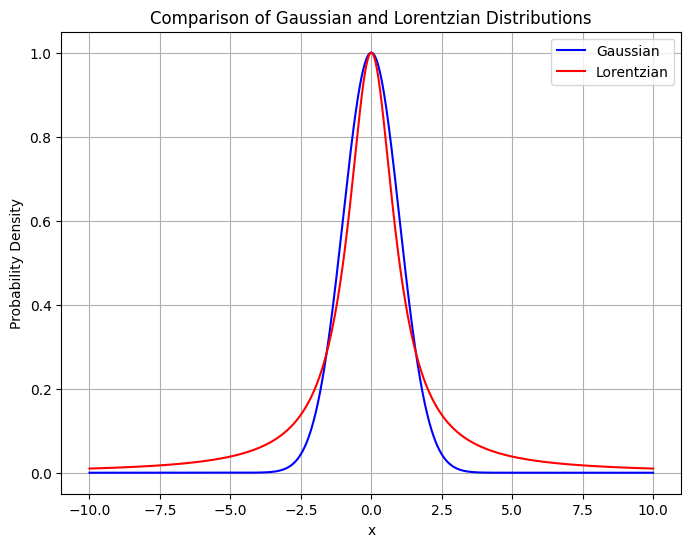

Gaussian 90% confidence interval: ±1.65
Lorentzian 90% confidence interval: ±2.58


In [1]:
import numpy as np
import matplotlib.pyplot as plt

# Define Gaussian and Lorentzian functions
def gaussian(x, mu, sigma):
    return (1 / (np.sqrt(2 * np.pi) * sigma)) * np.exp(-(x - mu)**2 / (2 * sigma**2))

def lorentzian(x, mu, w):
    return 1 / (1 + ((x - mu) / (w / 2))**2)

# Parameters for Gaussian and Lorentzian
mu = 0  # Mean
sigma = 1  # Standard deviation for Gaussian
w = 2  # Full Width at Half Maximum (FWHM) for Lorentzian

# Create an array of x values for plotting
x = np.linspace(-10, 10, 1000)

# Evaluate both distributions
gaussian_y = gaussian(x, mu, sigma)
lorentzian_y = lorentzian(x, mu, w)

# Normalize both distributions to have the same value at the peak (x = mu)
gaussian_y /= max(gaussian_y)  # Normalize Gaussian
lorentzian_y /= max(lorentzian_y)  # Normalize Lorentzian

# Plot the Gaussian and Lorentzian distributions
plt.figure(figsize=(8, 6))
plt.plot(x, gaussian_y, label="Gaussian", color='blue')
plt.plot(x, lorentzian_y, label="Lorentzian", color='red')
plt.title("Comparison of Gaussian and Lorentzian Distributions")
plt.xlabel("x")
plt.ylabel("Probability Density")
plt.legend()
plt.grid(True)
plt.show()

# Calculate the equivalent 90% confidence interval for Lorentzian and Gaussian
# For Gaussian, the 90% confidence interval is approximately ±1.645*sigma
gaussian_90_interval = 1.645 * sigma

# For Lorentzian, the 90% confidence interval is approximately ±1.29*w
lorentzian_90_interval = 1.29 * w

print(f"Gaussian 90% confidence interval: ±{gaussian_90_interval:.2f}")
print(f"Lorentzian 90% confidence interval: ±{lorentzian_90_interval:.2f}")

<div class="alert alert-block alert-success">
Answer: The Lorentzian has longer tails than the Gaussian, meaning that extreme values (far from the mean) are more probable in a Lorentzian than in a Gaussian distribution. This is why spectral lines, which can have sharp peaks and broad tails, are often described by the Lorentzian distribution. The Gaussian distribution decays exponentially at the tails, meaning that extreme values are less likely than in the Lorentzian. This makes the Gaussian more appropriate for modeling errors or noise, where extreme values are rarer. The 90% confidence interval for the Lorentzian is wider than that of the Gaussian, meaning it takes more of the Lorentzian's full width to cover the same amount of probability.
</div>